In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [4]:
path = '/home/akash/greyatom/Hackathon_1/Portuguese_Bank/data/raw/bank-additional.csv'

In [5]:
bank_data_full = pd.read_csv(path,sep=';')

In [6]:
bank_data_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [7]:
bank_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [8]:
rename_cols = {'emp.var.rate':'emp_var_rate','cons.price.idx':'cons_price_idx','cons.conf.idx':'cons_conf_idx','nr.employed':'nr_employed'}
bank_data_full.rename(columns=rename_cols,inplace=True)

In [9]:
bank_data_full_category = bank_data_full.select_dtypes(include=['object_'])

In [10]:
bank_data_full_category.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent,no
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent,no
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent,no
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent,no


In [11]:
bank_data_full_numeric = bank_data_full.select_dtypes(include=['number'])

In [12]:
bank_data_full_numeric.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8


In [13]:
bank_data_full_numeric.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
y = bank_data_full.iloc[:,-1]

In [15]:
numeric_cols = bank_data_full_numeric.columns
numeric_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

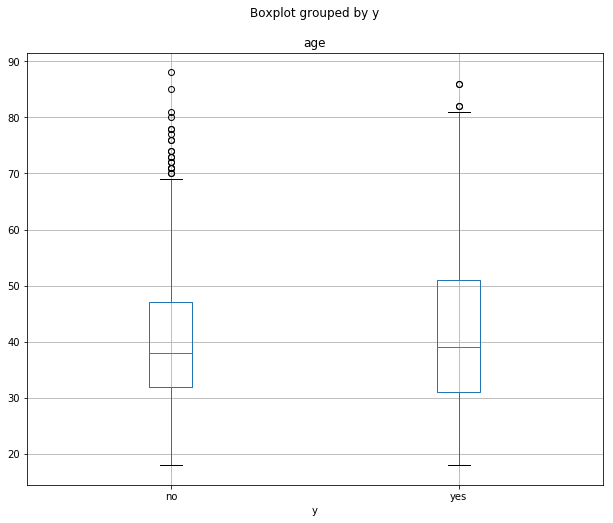

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
bank_data_full.boxplot(column=['age'], by='y', ax=ax)

y
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

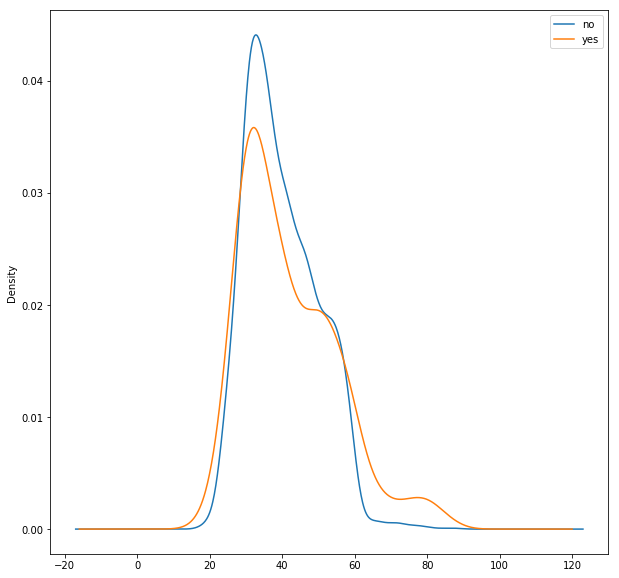

In [61]:
f, axes = plt.subplots(1, 1, figsize=(10, 10),squeeze=False)
f.subplots_adjust(hspace=.3, wspace=.25)
bank_data_full.groupby('y').age.plot(kind='kde', ax=axes[0][0], legend=True)

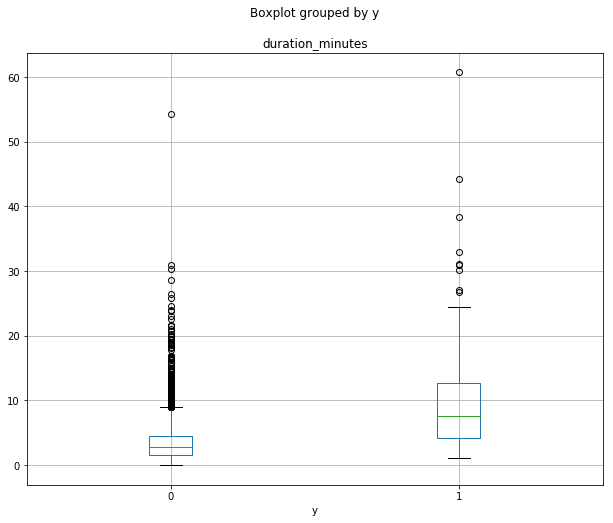

In [178]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
bank_data_full.boxplot(column=['duration_minutes'], by='y', ax=ax)

y
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration, dtype: object

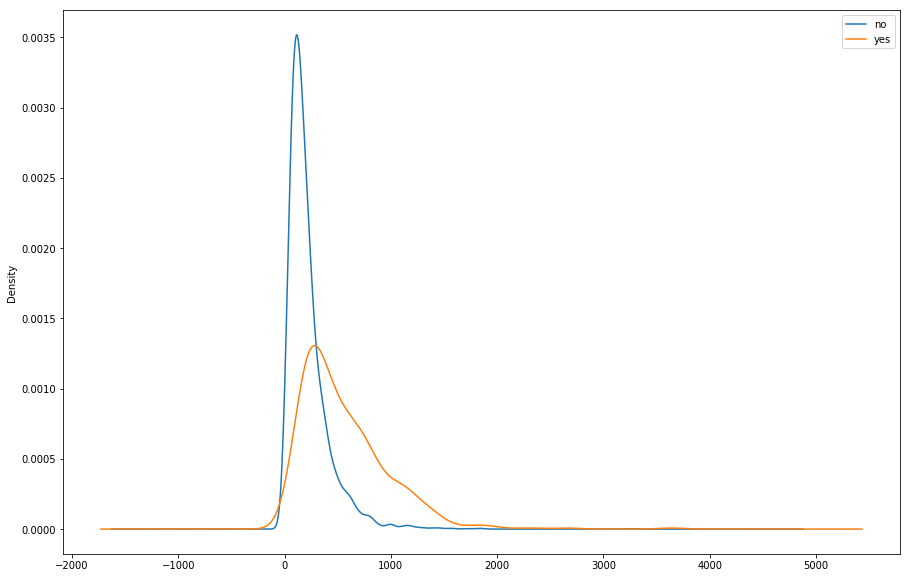

In [62]:
f, axes = plt.subplots(1, 1, figsize=(15, 10),squeeze=False)
f.subplots_adjust(hspace=.3, wspace=.25)
bank_data_full.groupby('y').duration.plot(kind='kde', ax=axes[0][0], legend=True)

y
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration_minutes, dtype: object

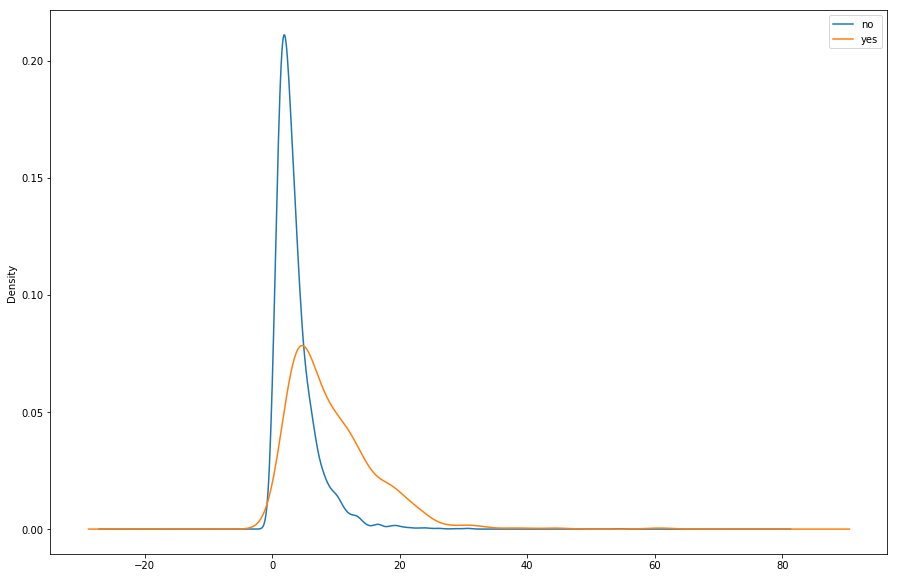

In [80]:
bank_data_full['duration_minutes'] = bank_data_full['duration']/60
f, axes = plt.subplots(1, 1, figsize=(15, 10),squeeze=False)
f.subplots_adjust(hspace=.3, wspace=.25)
bank_data_full.groupby('y').duration_minutes.plot(kind='kde', ax=axes[0][0], legend=True)

y
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: campaign, dtype: object

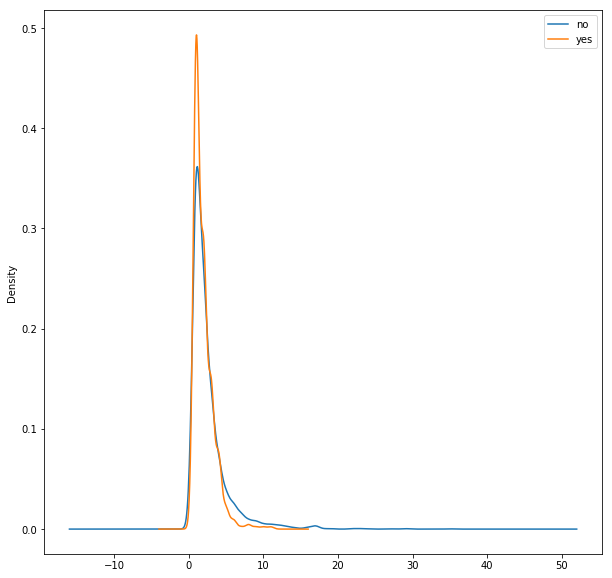

In [63]:
f, axes = plt.subplots(1, 1, figsize=(10, 10),squeeze=False)
f.subplots_adjust(hspace=.3, wspace=.25)
bank_data_full.groupby('y').campaign.plot(kind='kde', ax=axes[0][0], legend=True)

y
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: pdays, dtype: object

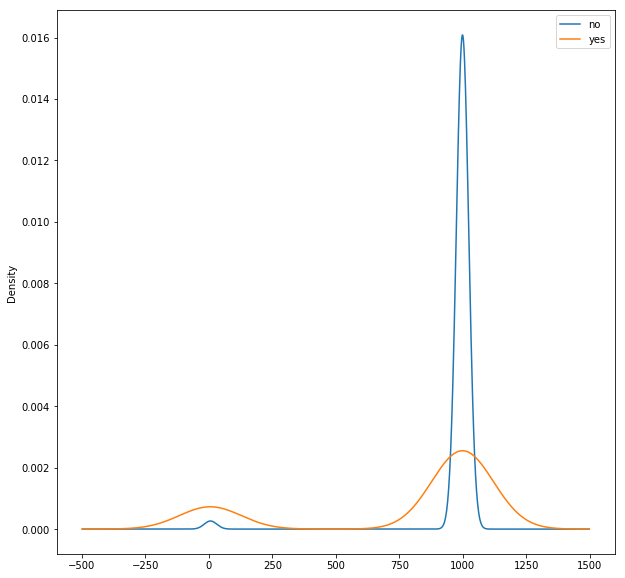

In [64]:
f, axes = plt.subplots(1, 1, figsize=(10, 10),squeeze=False)
f.subplots_adjust(hspace=.3, wspace=.25)
bank_data_full.groupby('y').pdays.plot(kind='kde', ax=axes[0][0], legend=True)

y
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: previous, dtype: object

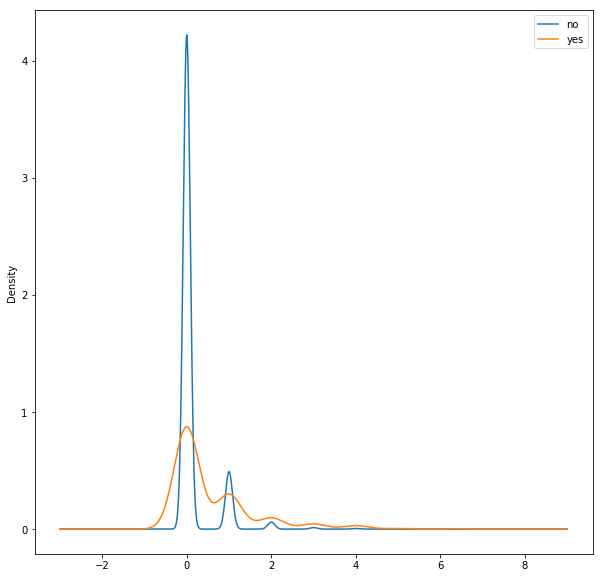

In [65]:
f, axes = plt.subplots(1, 1, figsize=(10, 10),squeeze=False)
f.subplots_adjust(hspace=.3, wspace=.25)
bank_data_full.groupby('y').previous.plot(kind='kde', ax=axes[0][0], legend=True)

y
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: emp_var_rate, dtype: object

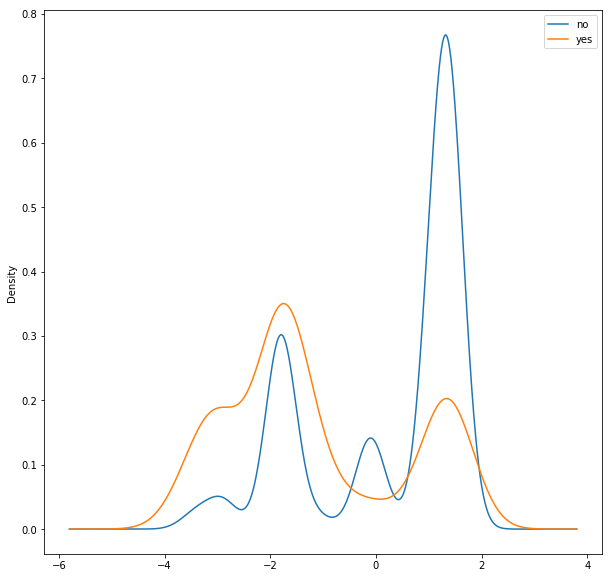

In [66]:
f, axes = plt.subplots(1, 1, figsize=(10, 10),squeeze=False)
f.subplots_adjust(hspace=.3, wspace=.25)
bank_data_full.groupby('y').emp_var_rate.plot(kind='kde', ax=axes[0][0], legend=True)

y
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: cons_price_idx, dtype: object

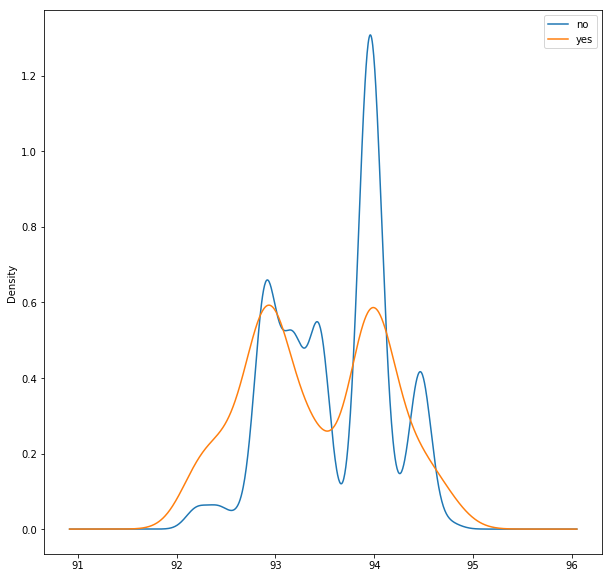

In [67]:
f, axes = plt.subplots(1, 1, figsize=(10, 10),squeeze=False)
f.subplots_adjust(hspace=.3, wspace=.25)
bank_data_full.groupby('y').cons_price_idx.plot(kind='kde', ax=axes[0][0], legend=True)

y
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: cons_conf_idx, dtype: object

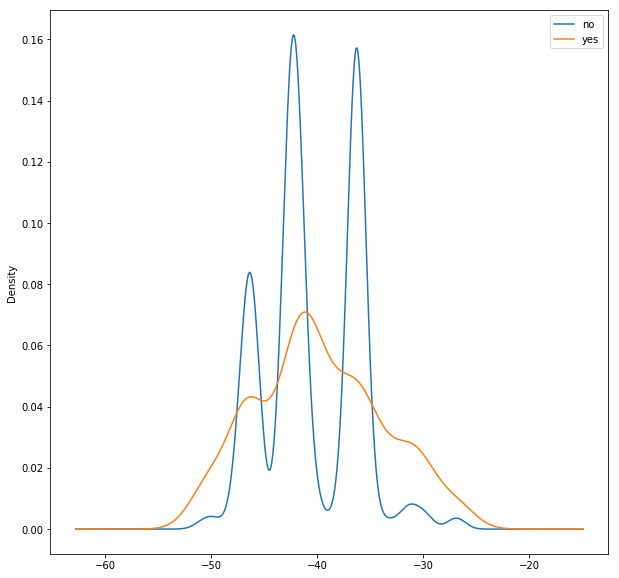

In [68]:
f, axes = plt.subplots(1, 1, figsize=(10, 10),squeeze=False)
f.subplots_adjust(hspace=.3, wspace=.25)
bank_data_full.groupby('y').cons_conf_idx.plot(kind='kde', ax=axes[0][0], legend=True)

y
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: euribor3m, dtype: object

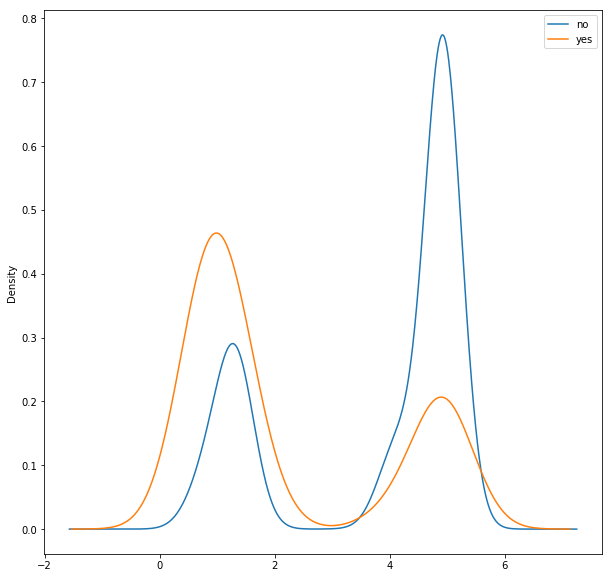

In [69]:
f, axes = plt.subplots(1, 1, figsize=(10, 10),squeeze=False)
f.subplots_adjust(hspace=.3, wspace=.25)
bank_data_full.groupby('y').euribor3m.plot(kind='kde', ax=axes[0][0], legend=True)

y
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: nr_employed, dtype: object

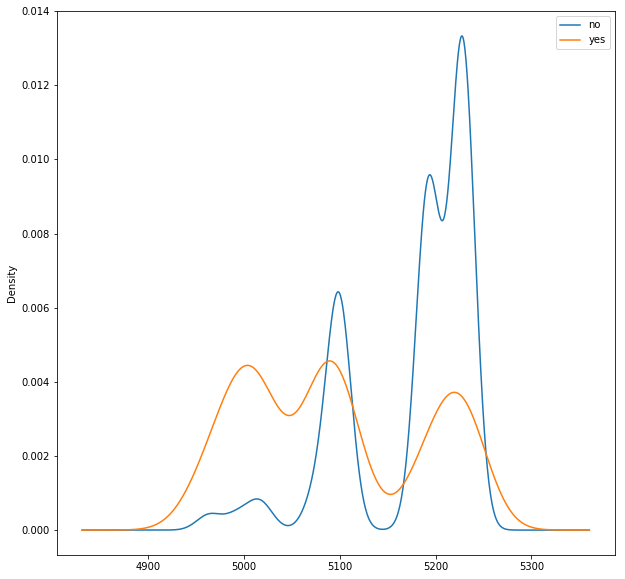

In [70]:
f, axes = plt.subplots(1, 1, figsize=(10, 10),squeeze=False)
f.subplots_adjust(hspace=.3, wspace=.25)
bank_data_full.groupby('y').nr_employed.plot(kind='kde', ax=axes[0][0], legend=True)

In [71]:
def _print_chisquare_result(self, colX, alpha):
    result = ""
    if self.p<alpha:
        result="{0} is IMPORTANT for Prediction".format(colX)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

    print(result)

In [72]:
def TestIndependence(self,colX,colY, alpha=0.05):
    X = self.df[colX].astype(str)
    Y = self.df[colY].astype(str)

    self.dfObserved = pd.crosstab(Y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
    self.p = p
    self.chi2 = chi2
    self.dof = dof 

    self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)

    self._print_chisquare_result(colX, alpha)

In [77]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfTabular = None
        self.dfExpected = None

    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction P-value is {1}".format(colX,self.p)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)

    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX, alpha)

In [78]:
#Initialize ChiSquare Class
cT = ChiSquare(bank_data_full)

In [79]:
#Feature Selection
testColumns = bank_data_full_category.columns
for var in testColumns:
    cT.TestIndependence(colX=var,colY="y" )

job is IMPORTANT for Prediction P-value is 1.2331316121045092e-10
marital is IMPORTANT for Prediction P-value is 0.016285726690484368
education is IMPORTANT for Prediction P-value is 0.002262143344636543
default is IMPORTANT for Prediction P-value is 5.599507868459048e-06
housing is NOT an important predictor. (Discard housing from model)
loan is NOT an important predictor. (Discard loan from model)
contact is IMPORTANT for Prediction P-value is 1.8479997217891733e-18
month is IMPORTANT for Prediction P-value is 2.8948750374216133e-59
day_of_week is NOT an important predictor. (Discard day_of_week from model)
poutcome is IMPORTANT for Prediction P-value is 2.0394130608178665e-99
y is IMPORTANT for Prediction P-value is 0.0


In [143]:
imp_cat_features = ['job','marital','education','default','contact','month','poutcome']
#imp_num_features = ['minutes']
imp_features = []
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for each_cat_feature in imp_cat_features:
    feat_name = each_cat_feature + '_endoded_feature'
    bank_data_full_category[feat_name] = label_encoder.fit_transform(bank_data_full_category[each_cat_feature])
    imp_features.append(feat_name)

/home/akash/venv/bank_portuguese/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [144]:
bank_data_full_category.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,job_endoded_feature,marital_endoded_feature,education_endoded_feature,default_endoded_feature,contact_endoded_feature,month_endoded_feature,poutcome_endoded_feature
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent,no,1,1,2,0,0,6,1
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent,no,7,2,3,0,1,6,1
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent,no,7,1,3,0,1,4,1
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent,no,7,1,2,0,1,4,1
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent,no,0,1,6,0,0,7,1


In [145]:
imp_features

['job_endoded_feature',
 'marital_endoded_feature',
 'education_endoded_feature',
 'default_endoded_feature',
 'contact_endoded_feature',
 'month_endoded_feature',
 'poutcome_endoded_feature']

In [146]:
X = bank_data_full_category[imp_features]

In [119]:
X['duration_minutes'] = bank_data_full['duration_minutes']

/home/akash/venv/bank_portuguese/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [147]:
X.info()
bank_data_full['y'] = label_encoder.fit_transform(bank_data_full['y'])
y = bank_data_full['y'].copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 7 columns):
job_endoded_feature          4119 non-null int64
marital_endoded_feature      4119 non-null int64
education_endoded_feature    4119 non-null int64
default_endoded_feature      4119 non-null int64
contact_endoded_feature      4119 non-null int64
month_endoded_feature        4119 non-null int64
poutcome_endoded_feature     4119 non-null int64
dtypes: int64(7)
memory usage: 225.3 KB


In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0,stratify=y)

In [173]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3295, 7) (824, 7) (3295,) (824,)


In [174]:
#Initialising Random Forest model
rf_clf=RandomForestClassifier(n_estimators=20,n_jobs=10,random_state=5)

#Fitting on data
rf_clf.fit(X_train, y_train)

#Scoring the model on train data
score_rf=rf_clf.score(X_train, y_train)
print("Training score: %.2f " % score_rf)

#Scoring the model on test_data
score_rf=rf_clf.score(X_test, y_test)
print("Testing score: %.2f " % score_rf)

Training score: 0.95 
Testing score: 0.89 


In [175]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
y_pred = rf_clf.predict(X_test)

accuracy = rf_clf.score(X_test,y_test)

print(accuracy)

precision = precision_score(y_test,y_pred)

print(precision)

recall = recall_score(y_test,y_pred)

print(recall)

f1 = f1_score(y_test,y_pred)

print(f1)

confusion_mat = confusion_matrix(y_test,y_pred)

print(confusion_mat)

0.8871359223300971
0.4594594594594595
0.18888888888888888
0.2677165354330709
[[714  20]
 [ 73  17]]


In [171]:
y_test.value_counts()

0    917
1    113
Name: y, dtype: int64

/home/akash/venv/bank_portuguese/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.23135341 0.07437933 0.16640114 0.01840532 0.03507455 0.28590404
 0.18848221]


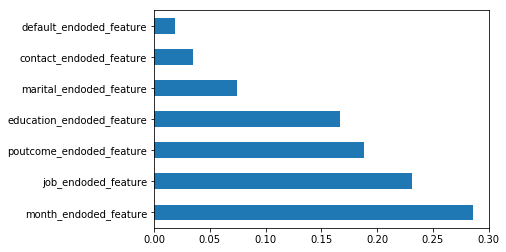

In [185]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model_extra_trees = ExtraTreesClassifier()
model_extra_trees.fit(X_train, y_train)
print(model_extra_trees.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_extra_trees.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

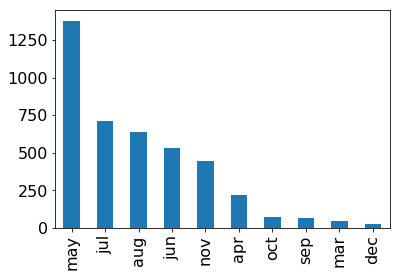

In [20]:
bank_data_full['month'].value_counts().plot(kind='bar')

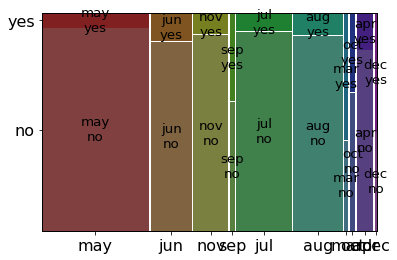

In [19]:
plt.rcParams['font.size'] = 16.0
mosaic(bank_data_full, ['month', 'y'])
plt.show()

In [ ]:
bank_data_full['month'].value_counts().plot(kind='bar')